# pandas_datareader

[Using Pandas DataReader to Access Online Data Sources in Python](https://www.relataly.com/using-pandas-datareader-in-python/10934/#:~:text=Pandas%20DataReader%20is%20a%20library,sources%20into%20a%20Pandas%20DataFrame.)

[More Remote Data Access](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

> conda install -c anaconda pandas-datareader <br>
> conda install -c conda-forge yfinance

### Step #1: Define the API Request Parameters

In [1]:
import pandas_datareader as webreader
import pandas as pd
import matplotlib.pyplot as plt

# Set the API 
data_source = "stooq"

# Set the API parameters
date_today = "2020-01-01" # period start date
date_start = "2010-01-01" # period end date
symbol = "PG"

### Step #2: Send the Request to the REST API Endpoint

In [9]:
# Send the request to the yahoo finance api endpoint
df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source=data_source)
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,115.584,116.107,115.140,116.018,5.166241e+06
2019-12-30,116.817,117.024,115.308,115.613,4.181775e+06
2019-12-27,116.639,117.310,116.472,117.133,5.589430e+06
2019-12-26,116.215,116.797,115.989,116.323,5.125894e+06
2019-12-24,115.909,116.413,115.703,116.323,2.176830e+06


### Step #3 Plot the Data

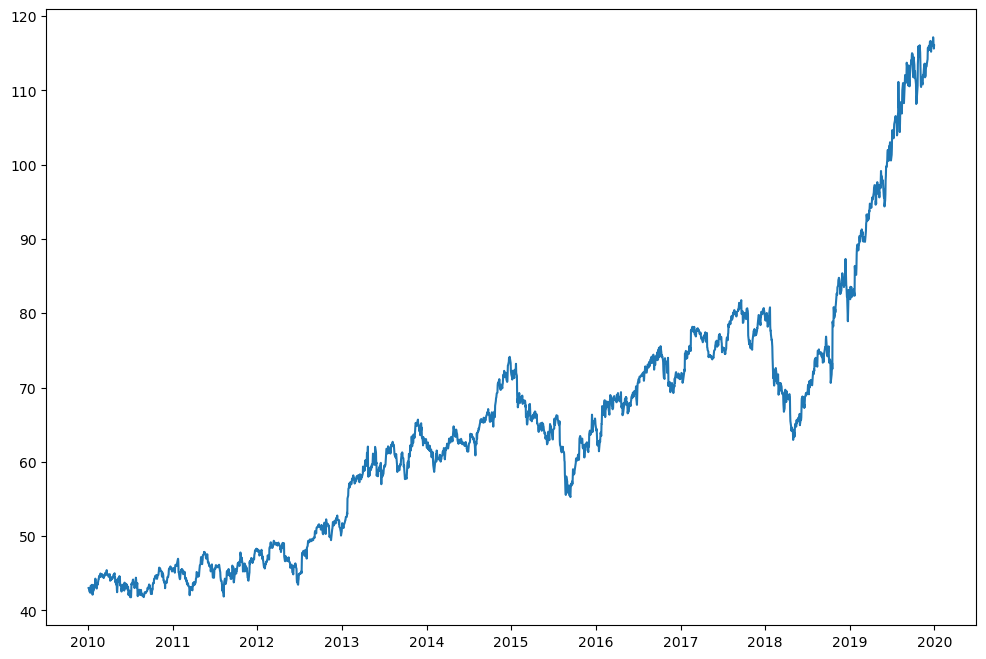

In [3]:
# Plot the closing prices
fig, ax1 = plt.subplots(figsize=(12, 8))
plt.plot(df.index, df.Close)
plt.show()

### Step #4: Save the Data to a CSV File

In [4]:
# Save the data to a CSV file
df.to_csv("data/price_quotes.csv", index=False)

In [5]:
!dir data

 Volume in drive C is OS
 Volume Serial Number is E055-4D73

 Directory of C:\Users\jaces\Documents\projects\MIT - DataScience\Data Analysis & Visualization\Virtual Class 2 - Network Analysis\data

06/09/2023  01:45 AM    <DIR>          .
06/09/2023  08:20 AM    <DIR>          ..
06/07/2023  09:27 PM    <DIR>          .ipynb_checkpoints
06/08/2023  01:23 AM    <DIR>          CAVIAR_Phases
06/08/2023  01:05 AM             6,229 CAVIAR_Phases.zip
06/08/2023  01:10 AM             1,945 EmailEnron.csv
06/07/2023  11:44 PM           385,875 g_test.gml
06/07/2023  11:44 PM            64,183 network_graph_example.png
06/09/2023  08:20 AM           121,876 price_quotes.csv
06/08/2023  01:10 AM            27,308 raw_data_books.zip
06/08/2023  01:09 AM        22,222,699 snp500_price_data_2011_to_2020.csv
06/08/2023  01:09 AM         2,305,348 snp500_price_data_2021.csv
               8 File(s)     25,135,463 bytes
               4 Dir(s)  357,348,798,464 bytes free


# Another example

Known issue: 
- ["TypeError: string indices must be integers" when getting data of a stock from Yahoo Finance using Pandas Datareader](https://stackoverflow.com/questions/74832296/typeerror-string-indices-must-be-integers-when-getting-data-of-a-stock-from-y)

> The short term fix could be to use **yfinance** override and see if that helps in the meanwhile until yahoo finance restores their data functionality?

- [typeerror: string indices must be integer pandas datareader](https://stackoverflow.com/questions/74912452/typeerror-string-indices-must-be-integer-pandas-datareader)


In [6]:
# We will get the dataset for yahoo
# price_data = webreader.DataReader('MMM', 'yahoo', end='2020-12-31', start='2011-01-01')  
# price_data = price_data['Adj Close']    # we will get all the data points and we also get the 
                                         # volume not only the close price, open price
# price_data.head()

# Using yfinance instead

In [7]:
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

PG = pdr.get_data_yahoo('PG', start='1995-1-1')
PG.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.722907,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.660999,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.552662,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.568139,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.537184,1795200


In [8]:
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr

price_data = pdr.get_data_yahoo(['MMM', 'AOS', 'ABT', 'ABBV'], start='1995-1-1')
price_data['Adj Close'] 

[*********************100%***********************]  4 of 4 completed


,ABBV,ABT,AOS,MMM
Date,,,,
1995-01-03,NaN,3.902277,1.601471,12.115240
1995-01-04,NaN,3.902277,1.585127,11.975018
1995-01-05,NaN,3.872491,1.593299,11.975018
1995-01-06,NaN,3.812916,1.593299,11.918926
1995-01-09,NaN,3.805721,1.576958,11.918926
...,...,...,...,...
2023-06-05,136.860001,103.760002,68.449997,97.980003
2023-06-06,135.429993,102.620003,68.639999,98.290001
2023-06-07,136.500000,101.660004,70.080002,101.000000


--------------------------